In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df = pd.read_csv('DogIntelligence.csv', encoding ='ISO-8859-1')
df

,Breed,height_low_inches,height_high_inches,weight_low_lbs,weight_high_lbs,reps_lower,reps_upper
0,Akita,26.0,28.0,80,120,1.0,4.0
1,A0tolian Sheepdog,27.0,29.0,100,150,1.0,4.0
2,Bernese Mountain Dog,23.0,27.0,85,110,1.0,4.0
3,Bloodhound,24.0,26.0,80,120,1.0,4.0
4,Borzoi,26.0,28.0,70,100,1.0,4.0
...,...,...,...,...,...,...,...
145,Papillon,8.0,11.0,5,10,NaN,NaN
146,Pomeranian,12.0,12.0,3,7,NaN,NaN
147,Poodle Toy,10.0,10.0,10,10,NaN,NaN
148,Toy Fox Terrier,10.0,10.0,4,7,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Breed               150 non-null    object 
 1   height_low_inches   150 non-null    float64
 2   height_high_inches  150 non-null    float64
 3   weight_low_lbs      150 non-null    int64  
 4   weight_high_lbs     150 non-null    int64  
 5   reps_lower          136 non-null    float64
 6   reps_upper          136 non-null    float64
dtypes: float64(4), int64(2), object(1)
memory usage: 8.3+ KB


In [ ]:
missing_values = df.isnull().sum()
missing_values

Breed                  0
height_low_inches      0
height_high_inches     0
weight_low_lbs         0
weight_high_lbs        0
reps_lower            14
reps_upper            14
dtype: int64

In [ ]:
df['reps_lower'].fillna(df['reps_lower'].mean(), inplace=True)
df['reps_upper'].fillna(df['reps_upper'].mean(), inplace=True)


In [ ]:
missing_values = df.isnull().sum()
missing_values

Breed                 0
height_low_inches     0
height_high_inches    0
weight_low_lbs        0
weight_high_lbs       0
reps_lower            0
reps_upper            0
dtype: int64

# **BAR GRAPH**

<ipython-input-25-638b9d69f6d3>:10: UserWarning: Glyph 137 (\x89) missing from current font.
  plt.tight_layout()
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 137 (\x89) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


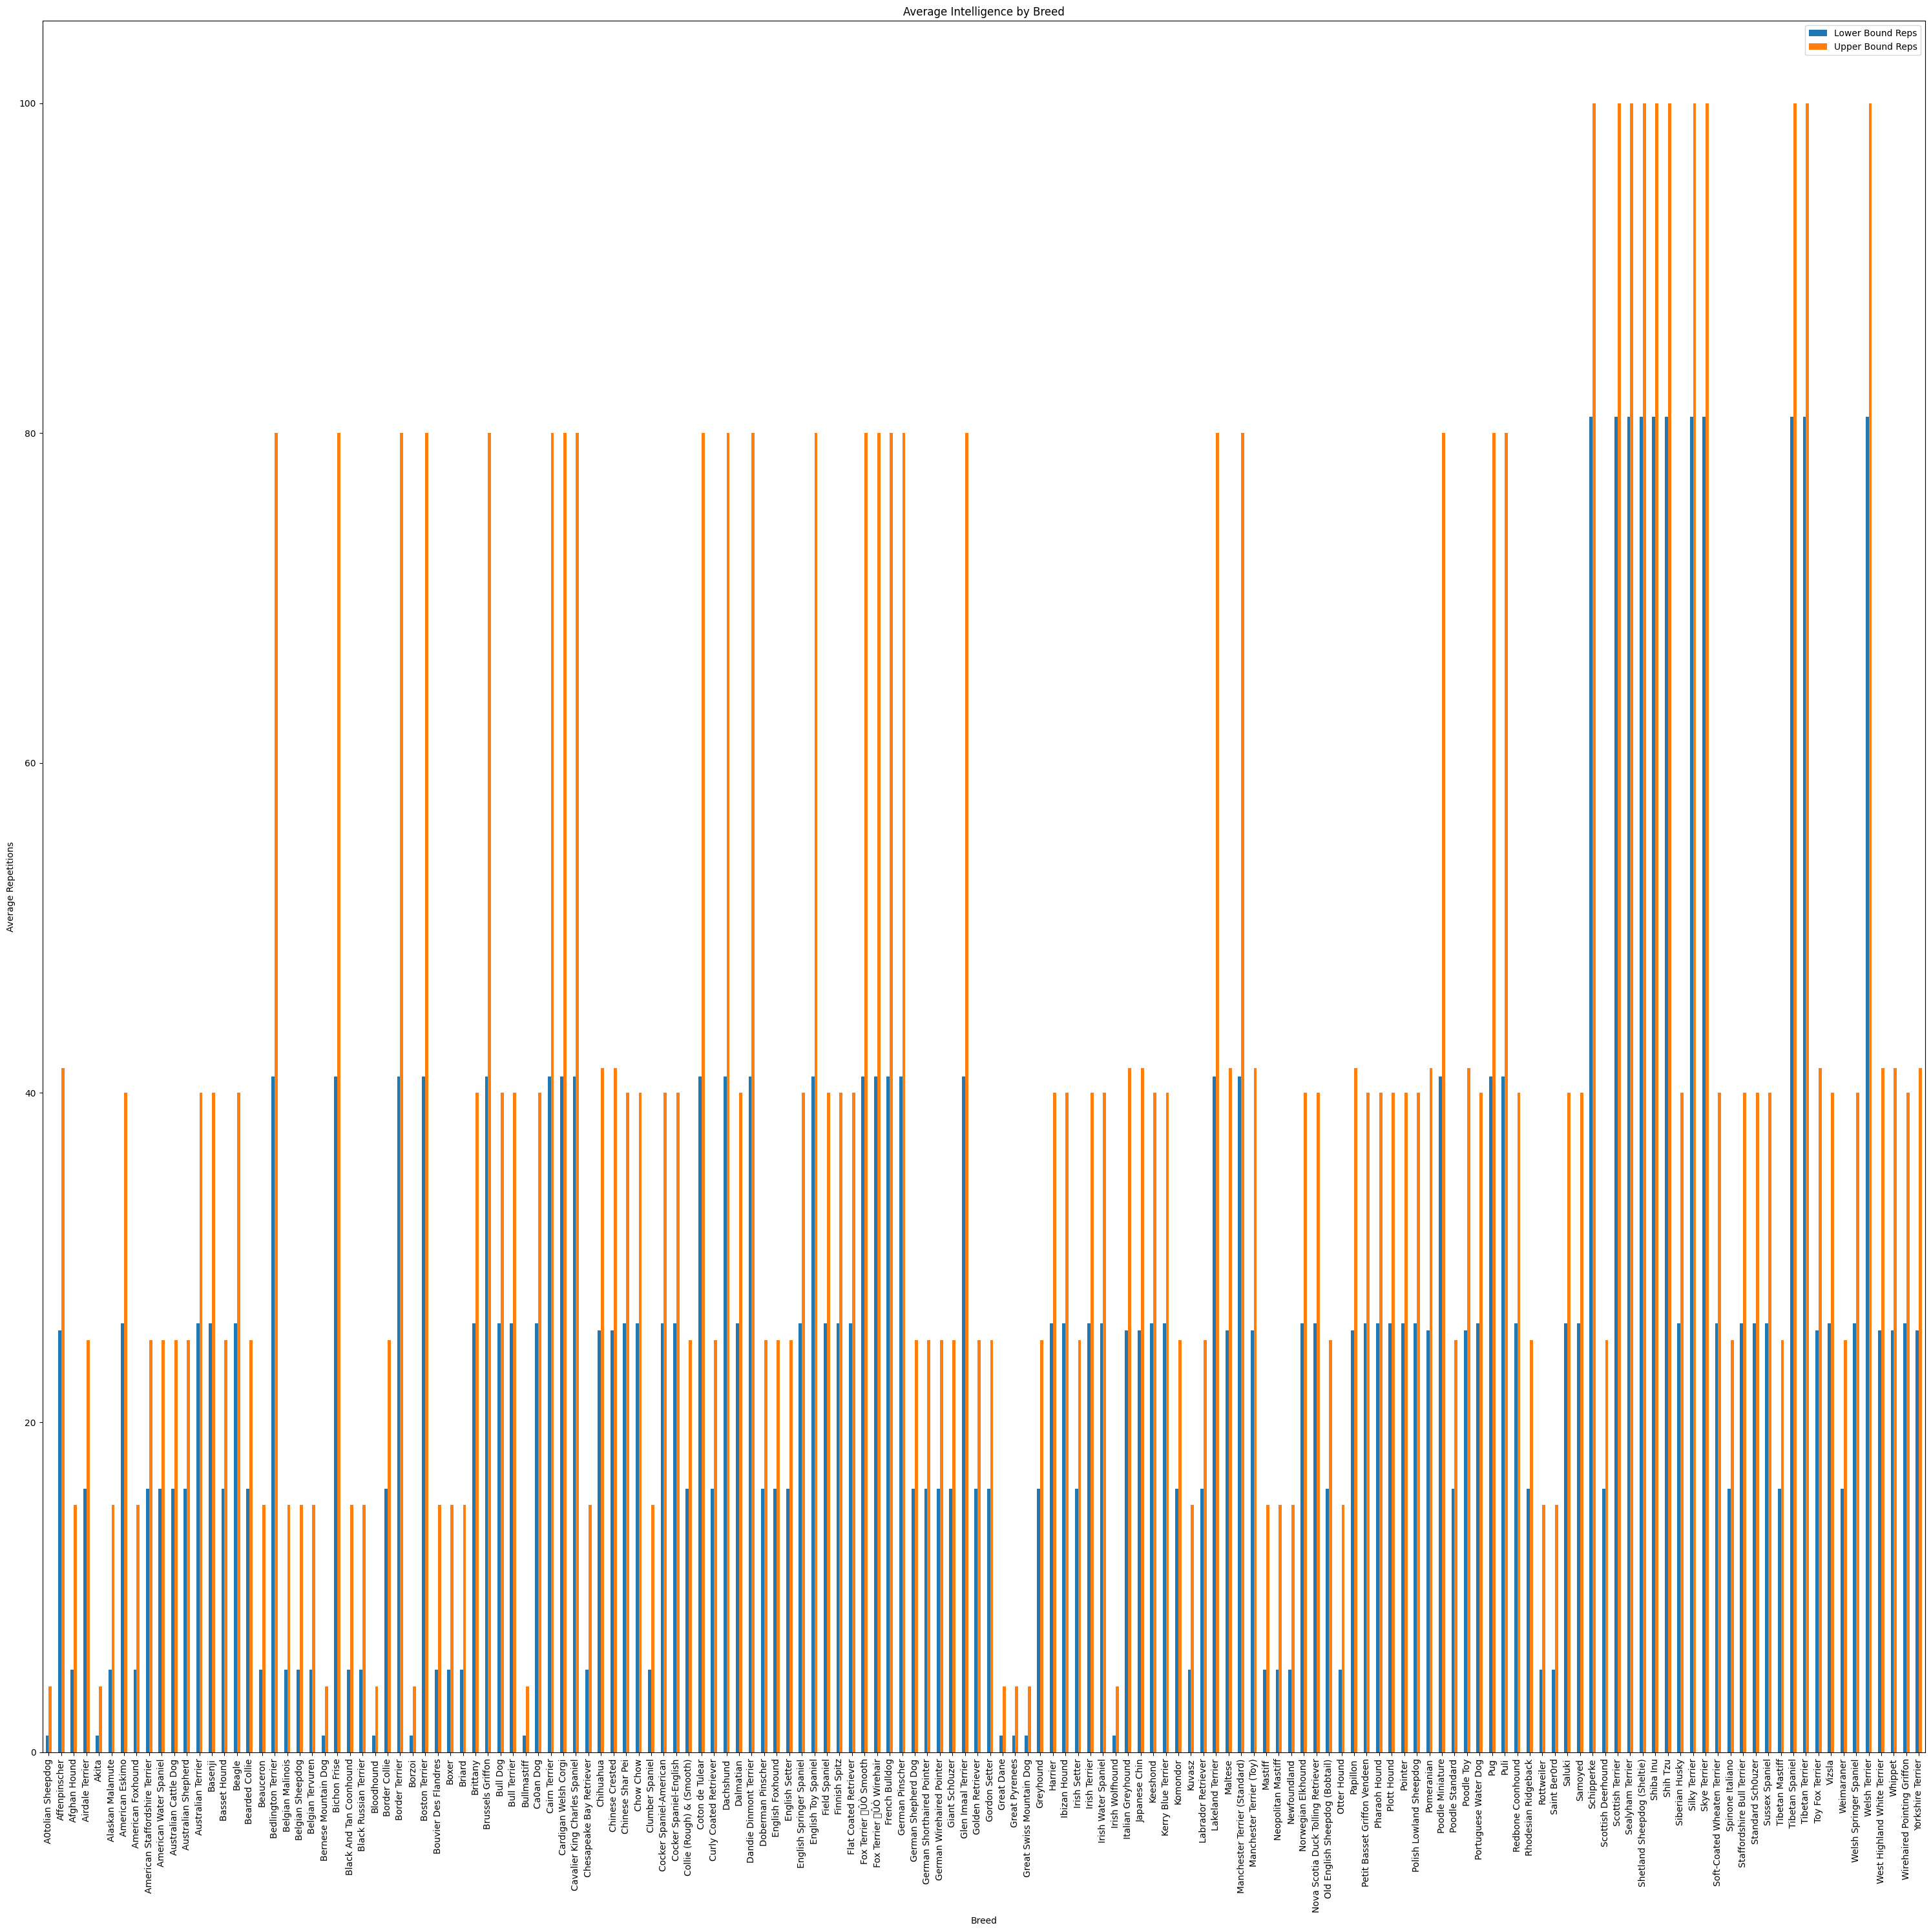

In [ ]:
intelligence_by_breed = df.groupby('Breed')[['reps_lower', 'reps_upper']].mean()

# Plot the bar graph
intelligence_by_breed.plot(kind='bar', figsize=(30, 30))
plt.title('Average Intelligence by Breed')
plt.xlabel('Breed')
plt.ylabel('Average Repetitions')
plt.xticks(rotation=90)
plt.legend(['Lower Bound Reps', 'Upper Bound Reps'])
plt.tight_layout()
plt.show()

*to find the breed with highest and lowest repetitions*

In [ ]:
# Find the breed with the highest average repetitions
highest_breed = intelligence_by_breed['reps_lower'].idxmax()
highest_reps = intelligence_by_breed['reps_lower'].max()

# Find the breed with the lowest average repetitions
lowest_breed = intelligence_by_breed['reps_lower'].idxmin()
lowest_reps = intelligence_by_breed['reps_lower'].min()

print(f"The breed with the highest average repetitions is '{highest_breed}' with {highest_reps} repetitions.")
print(f"The breed with the lowest average repetitions is '{lowest_breed}' with {lowest_reps} repetitions.")


The breed with the highest average repetitions is 'Schipperke' with 81.0 repetitions.
The breed with the lowest average repetitions is 'A0tolian Sheepdog' with 1.0 repetitions.


# **HISTOGRAM**

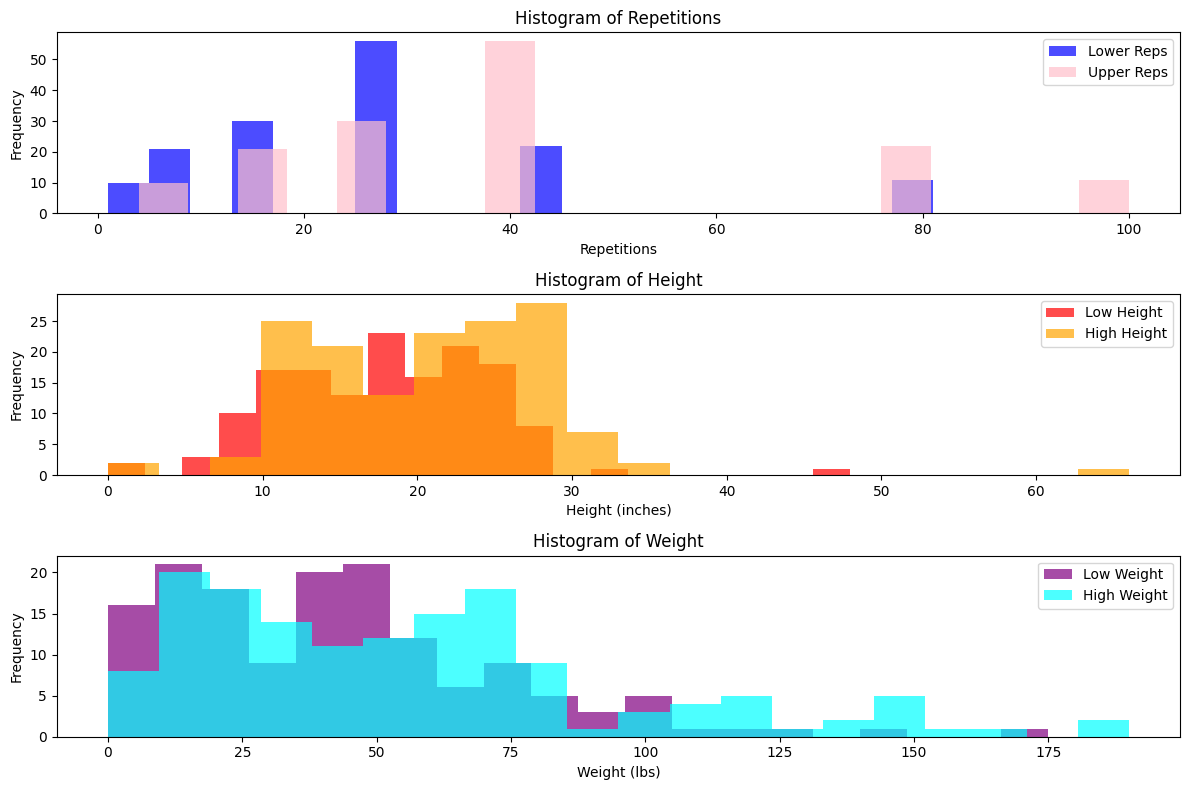

In [ ]:

plt.figure(figsize=(12, 8))

# Histogram for repetitions
plt.subplot(3, 1, 1)
plt.hist(df['reps_lower'], bins=20, color='blue', alpha=0.7, label='Lower Reps')
plt.hist(df['reps_upper'], bins=20, color='pink', alpha=0.7, label='Upper Reps')
plt.title('Histogram of Repetitions')
plt.xlabel('Repetitions')
plt.ylabel('Frequency')
plt.legend()

# Histogram for height
plt.subplot(3, 1, 2)
plt.hist(df['height_low_inches'], bins=20, color='red', alpha=0.7, label='Low Height')
plt.hist(df['height_high_inches'], bins=20, color='orange', alpha=0.7, label='High Height')
plt.title('Histogram of Height')
plt.xlabel('Height (inches)')
plt.ylabel('Frequency')
plt.legend()

# Histogram for weight
plt.subplot(3, 1, 3)
plt.hist(df['weight_low_lbs'], bins=20, color='purple', alpha=0.7, label='Low Weight')
plt.hist(df['weight_high_lbs'], bins=20, color='cyan', alpha=0.7, label='High Weight')
plt.title('Histogram of Weight')
plt.xlabel('Weight (lbs)')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()


In [ ]:
reps_lower_mean = df['reps_lower'].mean()
reps_upper_mean = df['reps_upper'].mean()
print(f"Mean Lower Repetitions: {reps_lower_mean}")
print(f"Mean Upper Repetitions: {reps_upper_mean}")

best_reps_breed = intelligence_by_breed['reps_lower'].idxmax()
least_reps_breed = intelligence_by_breed['reps_lower'].idxmin()
print(f"Best Reps Breed: {best_reps_breed}")
print(f"Least Reps Breed: {least_reps_breed}")


Mean Lower Repetitions: 25.58823529411764
Mean Upper Repetitions: 41.50735294117647
Best Reps Breed: Schipperke
Least Reps Breed: A0tolian Sheepdog


In [ ]:
height_low_mean = df['height_low_inches'].mean()
height_high_mean = df['height_high_inches'].mean()
print(f"Mean Low Height: {height_low_mean}")
print(f"Mean High Height: {height_high_mean}")



Mean Low Height: 17.72
Mean High Height: 20.673333333333332


In [ ]:
weight_low_mean = df['weight_low_lbs'].mean()
weight_high_mean = df['weight_high_lbs'].mean()
print(f"Mean Low Weight: {weight_low_mean}")
print(f"Mean High Weight: {weight_high_mean}")

Mean Low Weight: 42.39333333333333
Mean High Weight: 56.973333333333336


# **HEAT MAP**

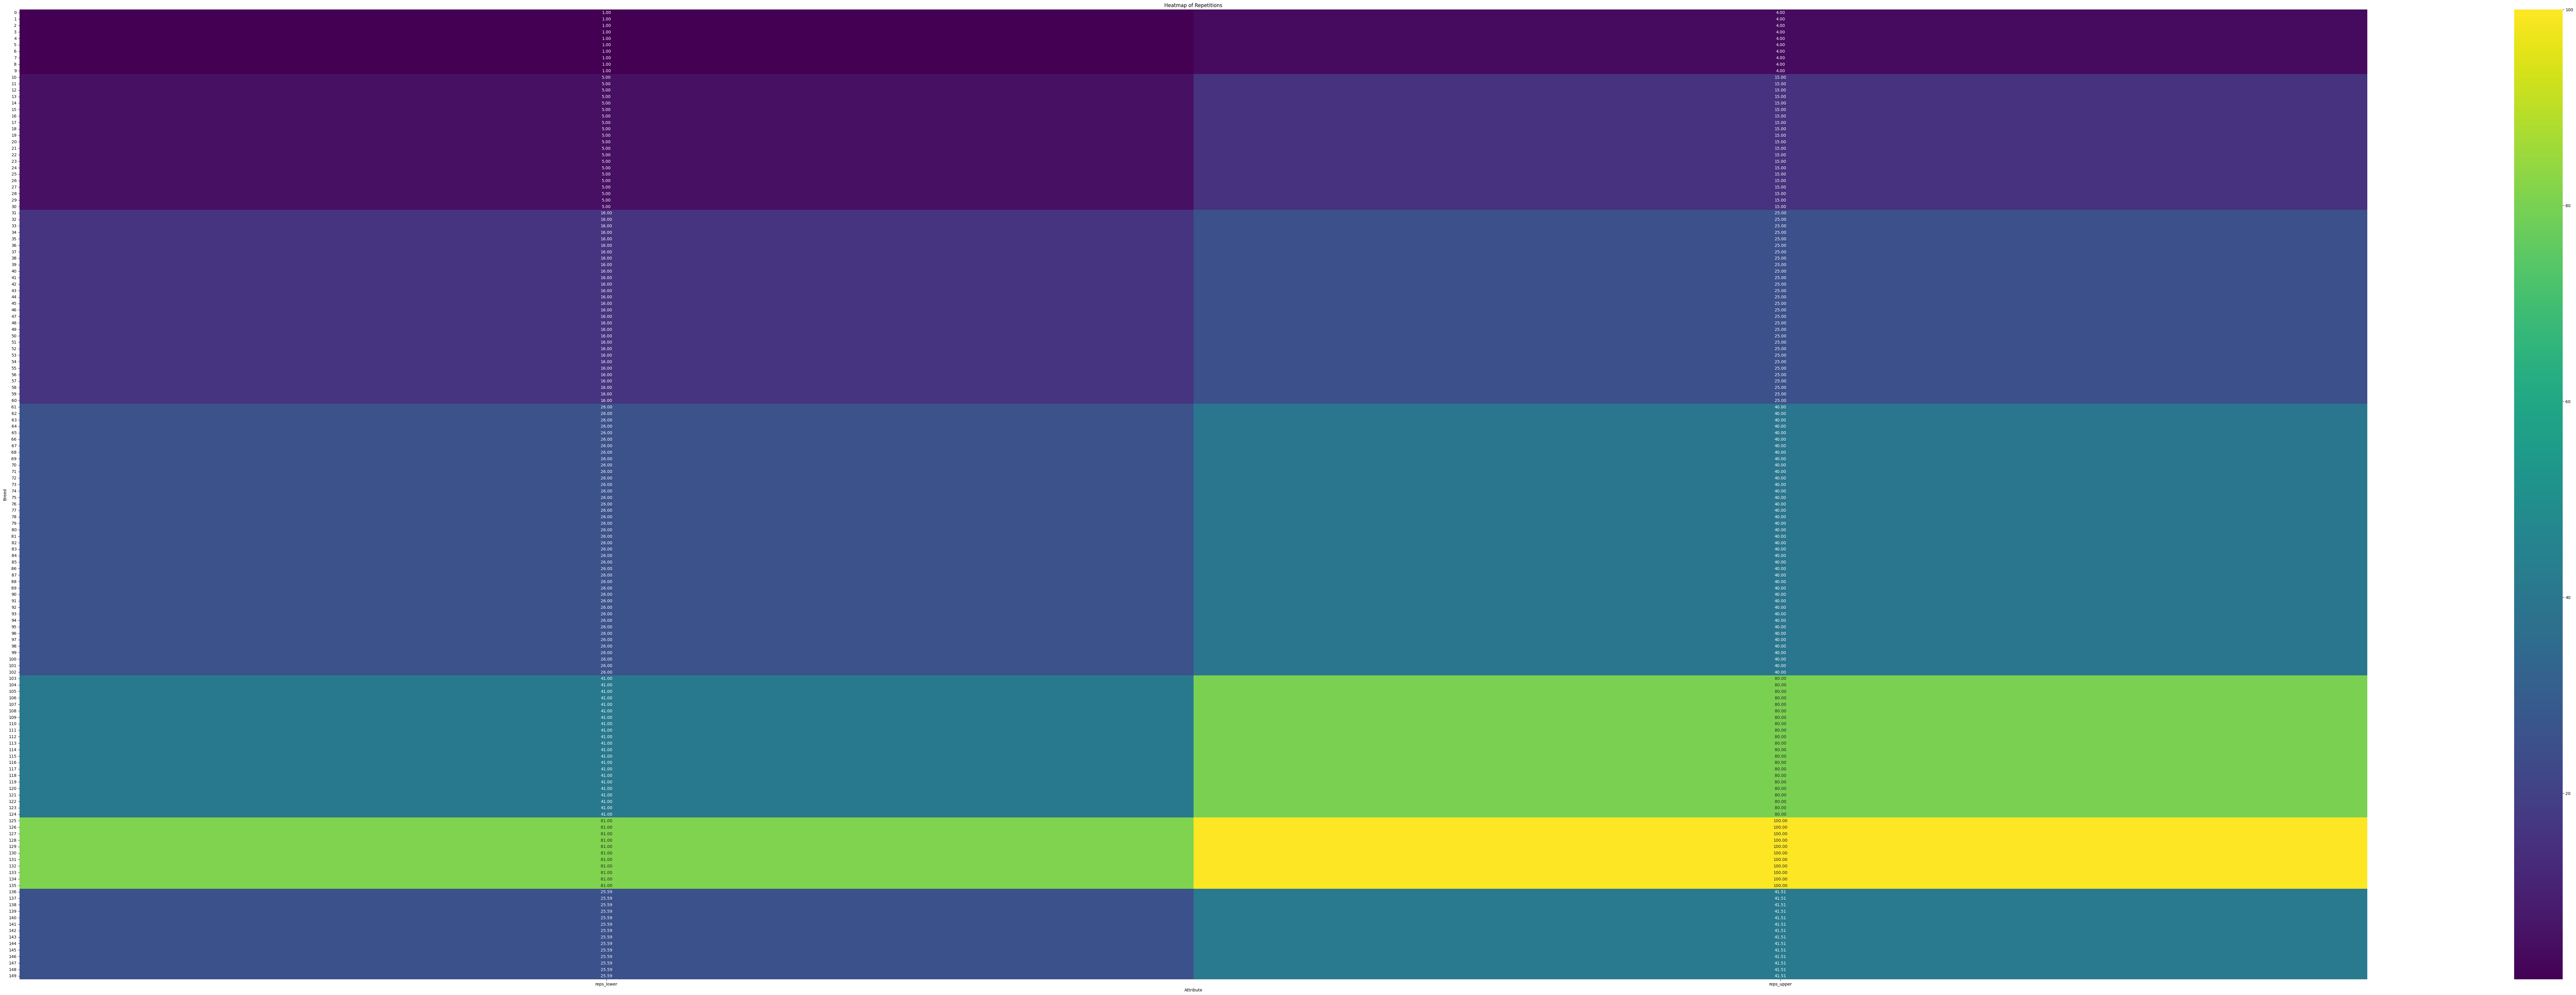

In [ ]:
plt.figure(figsize=(100, 100))

# Heatmap for repetitions
plt.subplot(3, 1, 1)
sns.heatmap(df[['reps_lower', 'reps_upper']], cmap='viridis', annot=True, fmt=".2f")
plt.title('Heatmap of Repetitions')
plt.xlabel('Attribute')
plt.ylabel('Breed')


plt.tight_layout()
plt.show()


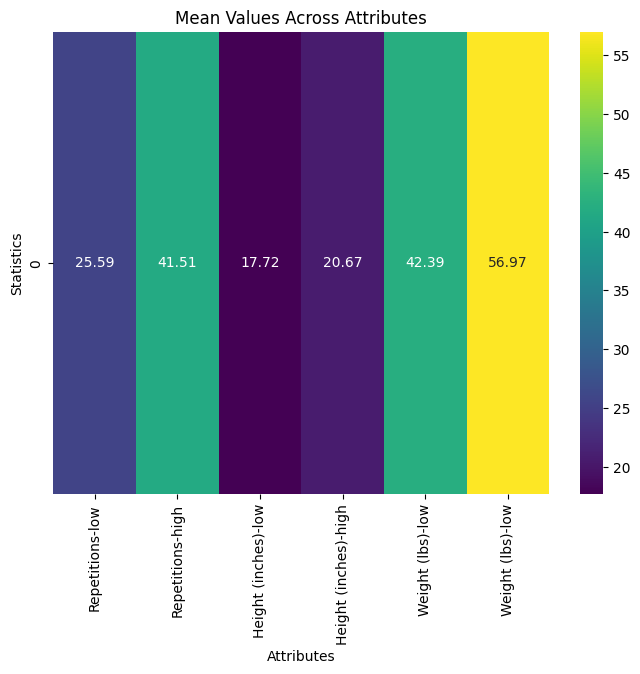

In [ ]:

mean_values = [reps_lower_mean,reps_upper_mean , height_low_mean,height_high_mean,weight_low_mean, weight_high_mean]


attributes = ['Repetitions-low','Repetitions-high', 'Height (inches)-low', 'Height (inches)-high','Weight (lbs)-low','Weight (lbs)-low']

plt.figure(figsize=(8, 6))
sns.heatmap(data=[mean_values], annot=True, cmap='viridis', fmt=".2f", xticklabels=attributes)
plt.title('Mean Values Across Attributes')
plt.xlabel('Attributes')
plt.ylabel('Statistics')
plt.show()

# **PIE CHART**

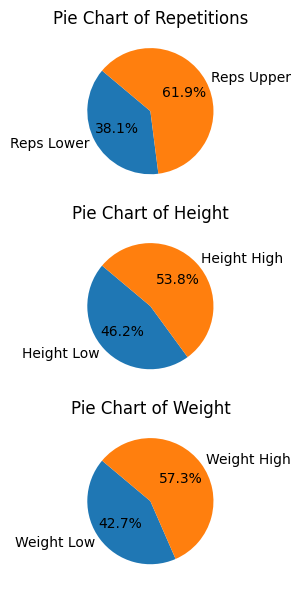

In [ ]:
plt.figure(figsize=(10,6))

# Pie chart for repetitions
plt.subplot(3, 1, 1)
reps_counts = df[['reps_lower', 'reps_upper']].sum().tolist()
plt.pie(reps_counts, labels=['Reps Lower', 'Reps Upper'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Repetitions')

# Pie chart for height
plt.subplot(3, 1, 2)
height_counts = df[['height_low_inches', 'height_high_inches']].sum().tolist()
plt.pie(height_counts, labels=['Height Low', 'Height High'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Height')

# Pie chart for weight
plt.subplot(3, 1, 3)
weight_counts = df[['weight_low_lbs', 'weight_high_lbs']].sum().tolist()
plt.pie(weight_counts, labels=['Weight Low', 'Weight High'], autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart of Weight')

plt.tight_layout()
plt.show()


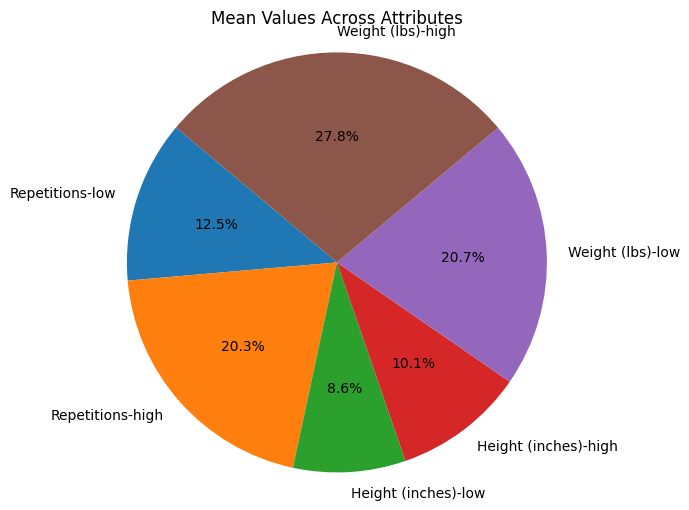

In [ ]:
mean_values = [reps_lower_mean, reps_upper_mean, height_low_mean, height_high_mean, weight_low_mean, weight_high_mean]

attributes = ['Repetitions-low', 'Repetitions-high', 'Height (inches)-low', 'Height (inches)-high', 'Weight (lbs)-low', 'Weight (lbs)-high']

plt.figure(figsize=(8, 6))
plt.pie(mean_values, labels=attributes, autopct='%1.1f%%', startangle=140)
plt.title('Mean Values Across Attributes')
plt.axis('equal')
plt.show()

# **LINE CHART**

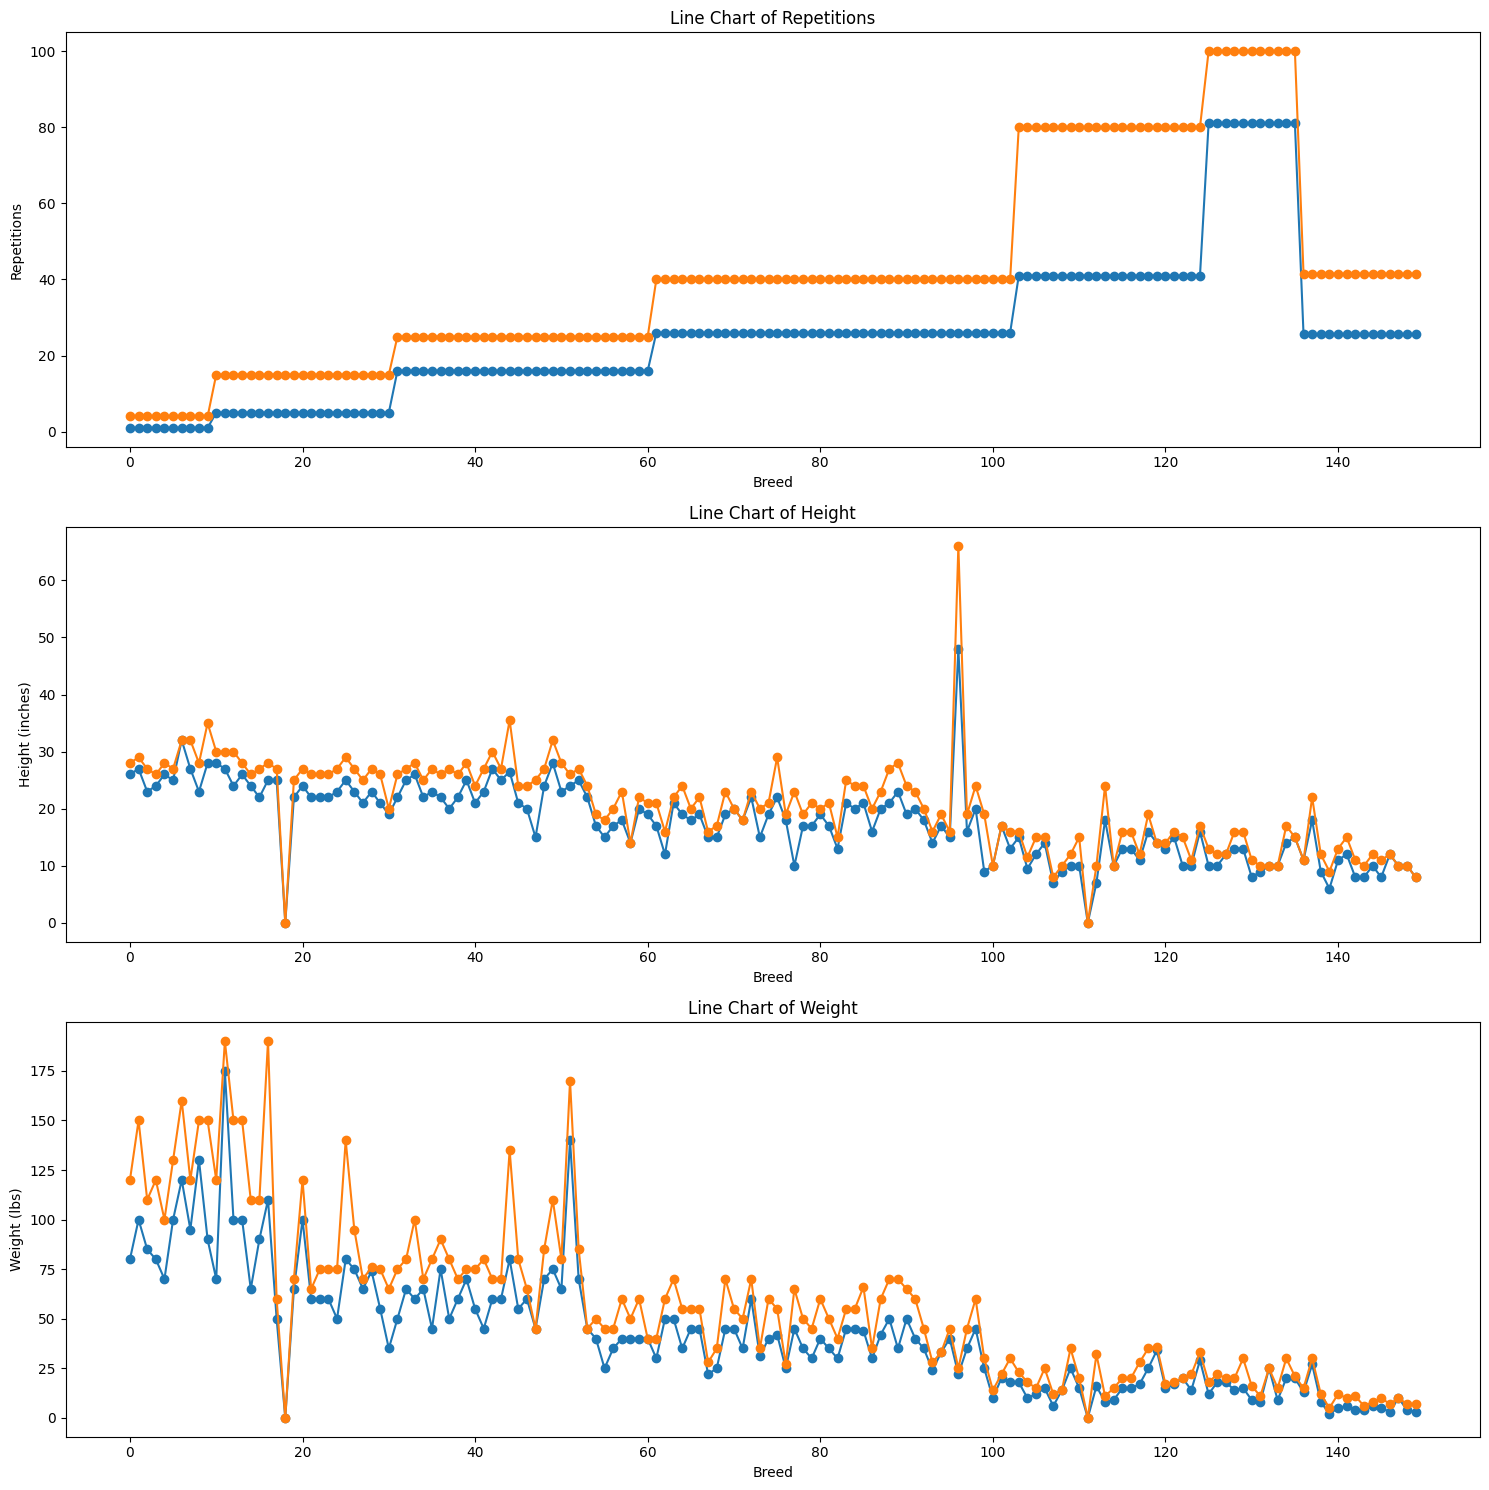

In [ ]:
plt.figure(figsize=(15,15))

# Line chart for repetitions
plt.subplot(3, 1, 1)
plt.plot(df[['reps_lower', 'reps_upper']], marker='o')
plt.title('Line Chart of Repetitions')
plt.xlabel('Breed')
plt.ylabel('Repetitions')

# Line chart for height
plt.subplot(3, 1, 2)
plt.plot(df[['height_low_inches', 'height_high_inches']], marker='o')
plt.title('Line Chart of Height')
plt.xlabel('Breed')
plt.ylabel('Height (inches)')

# Line chart for weight
plt.subplot(3, 1, 3)
plt.plot(df[['weight_low_lbs', 'weight_high_lbs']], marker='o')
plt.title('Line Chart of Weight')
plt.xlabel('Breed')
plt.ylabel('Weight (lbs)')

plt.tight_layout()
plt.show()



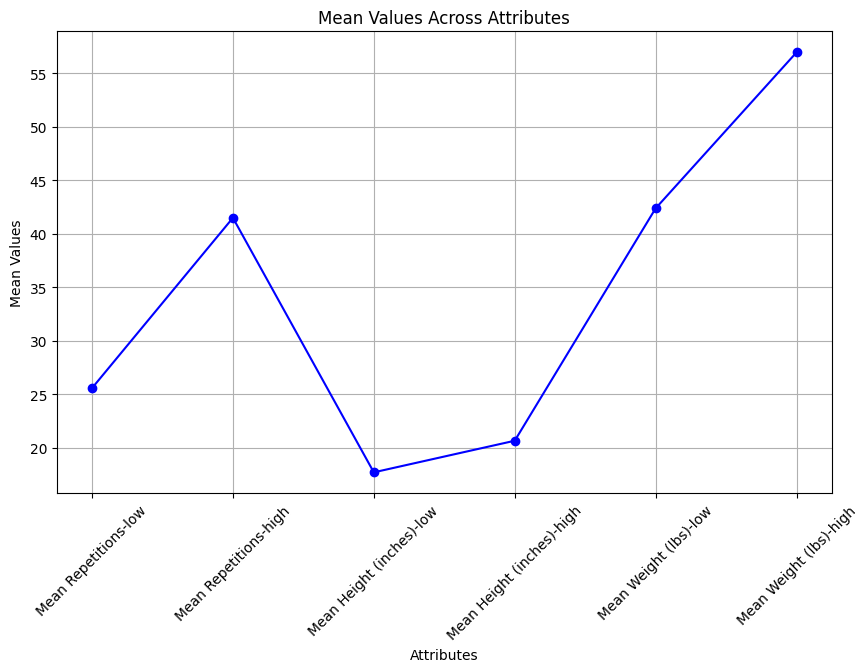

In [ ]:
import matplotlib.pyplot as plt

mean_values = [reps_lower_mean, reps_upper_mean, height_low_mean, height_high_mean, weight_low_mean, weight_high_mean]

attributes = ['Mean Repetitions-low', 'Mean Repetitions-high', 'Mean Height (inches)-low', 'Mean Height (inches)-high', 'Mean Weight (lbs)-low', 'Mean Weight (lbs)-high']

plt.figure(figsize=(10, 6))
plt.plot(attributes, mean_values, marker='o', color='b', linestyle='-')
plt.title('Mean Values Across Attributes')
plt.xlabel('Attributes')
plt.ylabel('Mean Values')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


# **SCATTER PLOT**

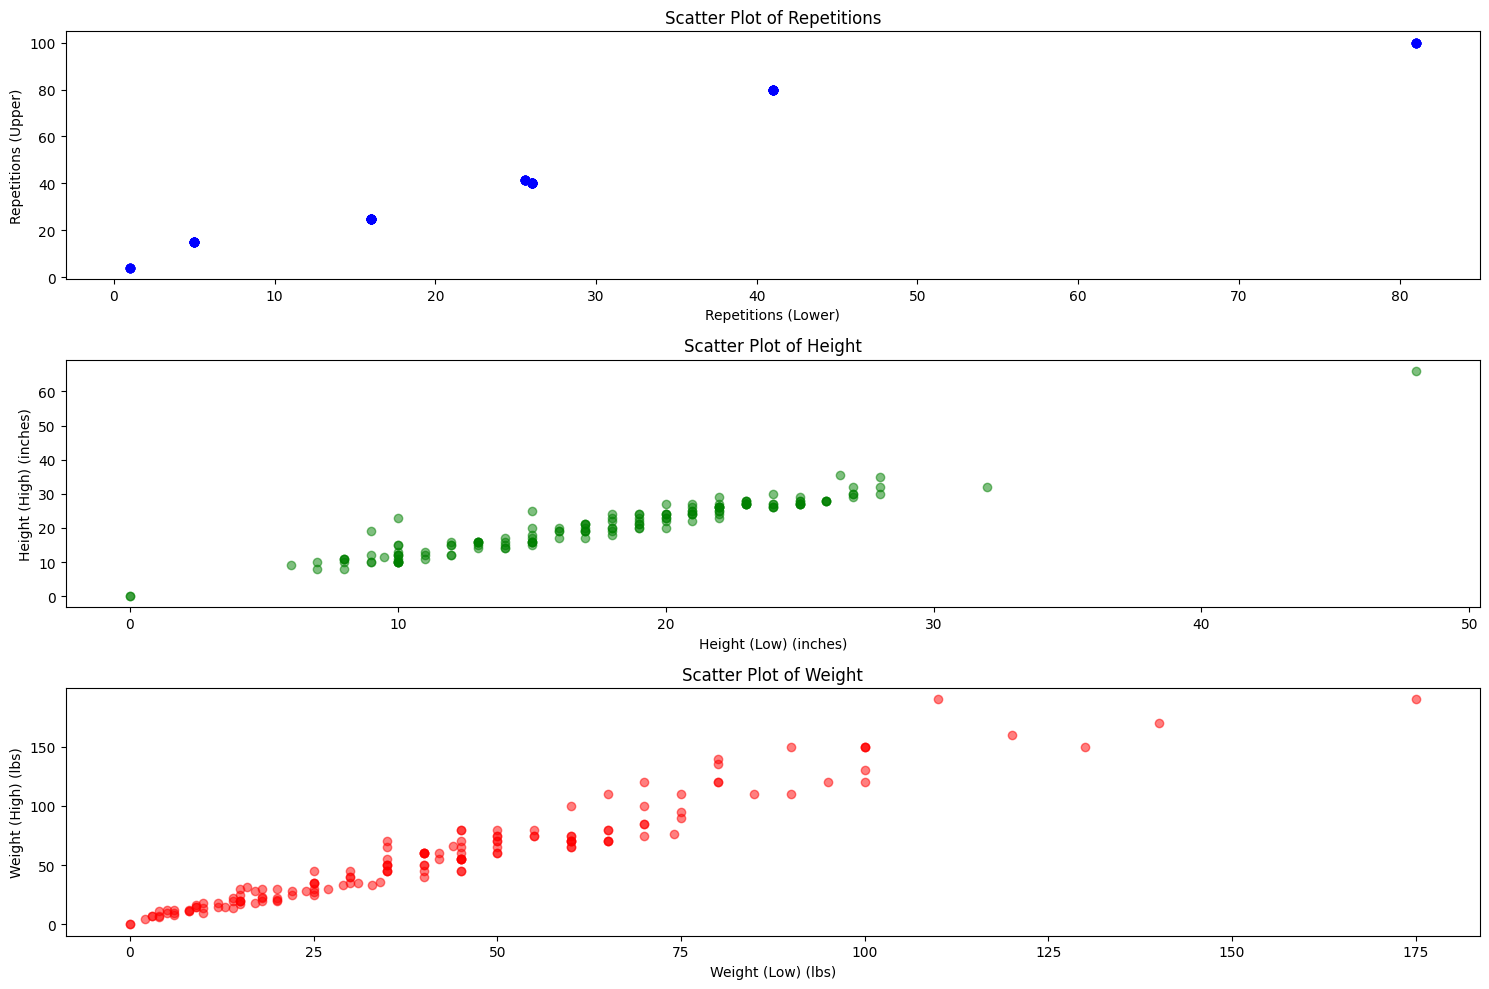

In [ ]:
plt.figure(figsize=(15,10))

# Scatter plot for repetitions
plt.subplot(3, 1, 1)
plt.scatter(df['reps_lower'], df['reps_upper'], marker='o', color='blue', alpha=0.5)
plt.title('Scatter Plot of Repetitions')
plt.xlabel('Repetitions (Lower)')
plt.ylabel('Repetitions (Upper)')

# Scatter plot for height
plt.subplot(3, 1, 2)
plt.scatter(df['height_low_inches'], df['height_high_inches'], marker='o', color='green', alpha=0.5)
plt.title('Scatter Plot of Height')
plt.xlabel('Height (Low) (inches)')
plt.ylabel('Height (High) (inches)')

# Scatter plot for weight
plt.subplot(3, 1, 3)
plt.scatter(df['weight_low_lbs'], df['weight_high_lbs'], marker='o', color='red', alpha=0.5)
plt.title('Scatter Plot of Weight')
plt.xlabel('Weight (Low) (lbs)')
plt.ylabel('Weight (High) (lbs)')

plt.tight_layout()
plt.show()


correlation matrix

In [ ]:
numeric_df = df.select_dtypes(include='number')
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

                    height_low_inches  height_high_inches  weight_low_lbs  \
height_low_inches            1.000000            0.959246        0.755766   
height_high_inches           0.959246            1.000000        0.698760   
weight_low_lbs               0.755766            0.698760        1.000000   
weight_high_lbs              0.760700            0.706829        0.963794   
reps_lower                  -0.576372           -0.549132       -0.626241   
reps_upper                  -0.639157           -0.608665       -0.679158   

                    weight_high_lbs  reps_lower  reps_upper  
height_low_inches          0.760700   -0.576372   -0.639157  
height_high_inches         0.706829   -0.549132   -0.608665  
weight_low_lbs             0.963794   -0.626241   -0.679158  
weight_high_lbs            1.000000   -0.628753   -0.681212  
reps_lower                -0.628753    1.000000    0.949904  
reps_upper                -0.681212    0.949904    1.000000  
